In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from nn.linearsymplectic import *
from nn.nonlinearsymplectic import *

In [3]:
# Generate training data

q = np.zeros(1000)
p = np.linspace(0, 8*np.pi, 1000)

np.random.seed(14583)
x = np.random.uniform(-4*np.pi, 4*np.pi, (1000,2))

print(x.shape)

f = lambda x: np.stack([
    x[:,0] + np.sin(x[:,1]),
    x[:,1]
], axis=1)

y = f(x)

(1000, 2)


In [4]:
def train(model, epochs = 10000):
    x_ = torch.tensor(x, requires_grad=True, dtype=torch.float32)
    y_ = torch.tensor(y, dtype=torch.float32)

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

    losses = []

    model.train()
    for epoch in range(epochs):
        if (epoch % 1000) == 0:
            print('training step: %d/%d' % (epoch, epochs))

        y1 = model(x_)
        loss = criterion(y1, y_)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.train(mode=False)

    n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print('Number of learnable parameters: ', n_parameters)
    
    # Plot losses
    fig, ax = plt.subplots()
    ax.plot(np.array(losses))
    ax.set_yscale('log')
    plt.show()

    print('Loss: ', losses[-1])

# Fully connected network

training step: 0/10000
training step: 1000/10000
training step: 2000/10000
training step: 3000/10000
training step: 4000/10000
training step: 5000/10000
training step: 6000/10000
training step: 7000/10000
training step: 8000/10000
training step: 9000/10000
Number of learnable parameters:  502


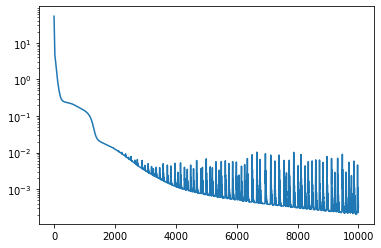

Loss:  0.00031397573184221983


In [6]:
fnn = torch.nn.Sequential(
    torch.nn.Linear(2,100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100,2)
)

train(fnn)

# Fully connected network with batch normalization

training step: 0/10000
training step: 1000/10000
training step: 2000/10000
training step: 3000/10000
training step: 4000/10000
training step: 5000/10000
training step: 6000/10000
training step: 7000/10000
training step: 8000/10000
training step: 9000/10000
Number of learnable parameters:  702


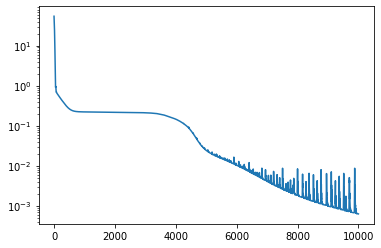

Loss:  0.0006248501595109701


In [7]:
fnn_normalized = torch.nn.Sequential(
    torch.nn.Linear(2,100),
    torch.nn.BatchNorm1d(100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100,2)
)

train(fnn_normalized)



# G-SympNet

training step: 0/10000
training step: 1000/10000
training step: 2000/10000
training step: 3000/10000
training step: 4000/10000
training step: 5000/10000
training step: 6000/10000
training step: 7000/10000
training step: 8000/10000
training step: 9000/10000
Number of learnable parameters:  300


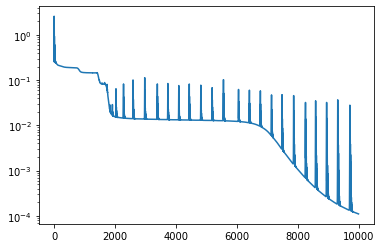

Loss:  0.00011055620416300371


In [5]:
activation_fn = torch.sigmoid
dim = 2

g_sympnet = UpperGradientModule(dim, n=100, bias=False, activation_fn=activation_fn)

train(g_sympnet)

# Normalized G-SympNet

training step: 0/10000
training step: 1000/10000
training step: 2000/10000
training step: 3000/10000
training step: 4000/10000
training step: 5000/10000
training step: 6000/10000
training step: 7000/10000
training step: 8000/10000
training step: 9000/10000
Number of learnable parameters:  300


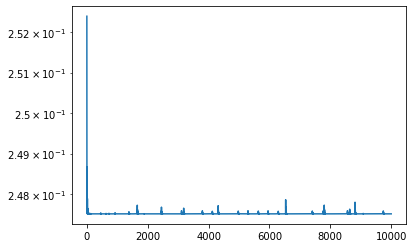

Loss:  0.24752621352672577


In [6]:
activation_fn = torch.sigmoid
dim = 2

g_sympnet_norm = NormalizedUpperGradientModule(dim, n=100, bias=False, activation_fn=activation_fn, affine=False)

train(g_sympnet_norm)